In [2]:
# download yolov4 weights that have already been converted to PyTorch
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /home/stockchicken/YOLOv4/yolov4.conv.137.pth
170MB [00:02, 68.9MB/s] 


In [1]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  print(device, torch.cuda.get_device_name(0))
else:
  device = torch.device("cpu")
  print(device)

cuda GeForce RTX 2080 Ti


In [2]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

2


In [3]:
!nvidia-smi

Mon Feb 22 16:50:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:01:00.0 Off |                  N/A |
| 44%   41C    P8    20W / 260W |    174MiB / 11016MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
import datetime

starttime = datetime.datetime.now()

#!python train.py -b 4 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 300
!python train.py -b 4 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 300

endtime = datetime.datetime.now()
print(endtime - starttime)

log file path:log/log_2021-02-22_16-50-27.txt
2021-02-22 16:50:27,715 train_copy.py[line:435] INFO: Using device cuda
Start Traing
2021-02-22 16:50:30,044 train_copy.py[line:268] INFO: Starting training:
        Epochs:          300
        Batch size:      4
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   216
        Validation size: 7
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 2
        Train label path:train.txt
        Pretrained:
    
Epoch 1/300:   0%|       | 0/216 [00:00<?, ?img/s]/home/stockchicken/miniconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/300:  35%|▎| 76/216 [00:38<00:49,  2.80img/home/stockchicken/miniconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:231: UserWarni

In [ ]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch100.pth  Yolov4_epoch190.pth  Yolov4_epoch280.pth
Yolov4_epoch10.pth   Yolov4_epoch200.pth  Yolov4_epoch290.pth
Yolov4_epoch110.pth  Yolov4_epoch20.pth   Yolov4_epoch300.pth
Yolov4_epoch120.pth  Yolov4_epoch210.pth  Yolov4_epoch30.pth
Yolov4_epoch130.pth  Yolov4_epoch220.pth  Yolov4_epoch40.pth
Yolov4_epoch140.pth  Yolov4_epoch230.pth  Yolov4_epoch50.pth
Yolov4_epoch150.pth  Yolov4_epoch240.pth  Yolov4_epoch60.pth
Yolov4_epoch160.pth  Yolov4_epoch250.pth  Yolov4_epoch70.pth
Yolov4_epoch170.pth  Yolov4_epoch260.pth  Yolov4_epoch80.pth
Yolov4_epoch180.pth  Yolov4_epoch270.pth  Yolov4_epoch90.pth


In [6]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [2]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

2


In [22]:
##change the epoch here to the one you would like to use for inference
import datetime
starttime = datetime.datetime.now()
num_classes = 2
!python models.py {num_classes} checkpoints/Yolov4_epoch300.pth train/0020.jpg test/_classes.txt

endtime = datetime.datetime.now()
print(endtime - starttime)

Model Start!!
[[0.5924425407459861, 0.5358762466593793, 0.18391485512256622, 0.06820652584888433, 0.6592767, 0.99997723, 0], [0.7197426086977908, 0.483475481209002, 0.42371904575511027, 0.11890176487596411, 0.61955965, 0.99999404, 0]]
608 608
WearTheLifeJacket: 0.999977
WearTheLifeJacket: 0.999994
save plot results to predictions.jpg
Model End!!
0:00:03.508865


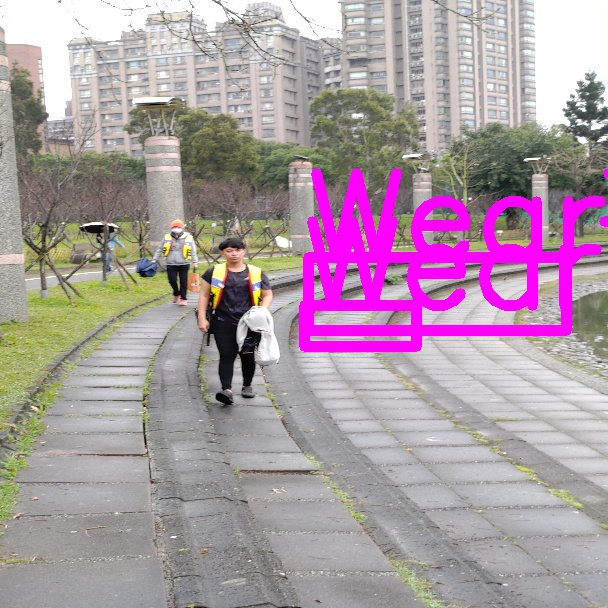

In [23]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')